<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/figures_plotting/Plotting_Batch_Correct_GeoMx_CIP_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Batch Correction GeoMx CIP all
#Ran 20230602
#Sup Figure 6D

# Mount Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Installing packages

In [ ]:
pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318075 sha256=d78d549e447e67f6611d908cb52740238a7a14d32e1a4a0c0debee219da22e7c
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
options(Ncpus = 8)
options(repos=structure(c(CRAN="http://cloud.r-project.org/")))
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
check.packages <- function(pkg){
    new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg))
        BiocManager::install(new.pkg, dependencies = TRUE,suppressUpdates = T)
    sapply(pkg, require, character.only = TRUE)
}

# Usage
packages<-c('GSEABase','gplots','statmod','limma', 'biomaRt','reshape2','WGCNA','Homo.sapiens','igraph','edgeR','genefilter','viridis','unikn','EGSEA','ReactomePA','clusterProfiler','ggnewscale')
check.packages(packages)

Streaming output truncated to the last 5000 lines.



































































































































































































































































































































































































































	‘/tmp/Rtmp1V4m5w/downloaded_packages’

  'jsonlite', 'knitr', 'pkgload', 'rmarkdown', 'roxygen2', 'sys', 'tidyverse',
  'whisker', 'boot', 'foreign'



Update all/some/none? [a/s/n]: a


Streaming output truncated to the last 5000 lines.
































































































































































































































































































































































































	‘/tmp/Rtmp1V4m5w/downloaded_packages’












	‘/tmp/Rtmp1V4m5w/downloaded_packages’




Attaching package: ‘BiocGenerics’



    IQR, mad, sd, var, xtabs



    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min





       GSEABase          gplots         statmod           limma         biomaRt 
           TRUE            TRUE            TRUE            TRUE            TRUE 
       reshape2           WGCNA    Homo.sapiens          igraph           edgeR 
           TRUE            TRUE            TRUE            TRUE            TRUE 
     genefilter         viridis           unikn           EGSEA      ReactomePA 
           TRUE            TRUE            TRUE           FALSE            TRUE 
clusterProfiler      ggnewscale 
           TRUE            TRUE 


In [ ]:
!sudo apt-get install msttcorefonts -qq

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 17.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libmspack0:amd64.
(Reading database ... 122542 files and directories currently installed.)
Preparing to unpack .../00-libmspack0_0.10.1-2_amd64.deb ...
Unpacking libmspack0:amd64 (0.10.1-2) ...
Selecting previously unselected package cabextract.
Preparing to unpack .../01-cabextract_1.9-3_amd64.deb ...
Unpacking cabextract (1.9-3) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../02-libfontenc1_1%3a1.1.4-0ubuntu1_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-0ubun

In [ ]:
!sudo apt install font-manager

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  font-manager-common font-viewer
Suggested packages:
  file-roller nautilus-font-manager nemo-font-manager yelp
The following NEW packages will be installed:
  font-manager font-manager-common font-viewer
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,740 kB of archives.
After this operation, 9,394 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager-common amd64 0.7.7-0.3 [1,545 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-viewer amd64 0.7.7-0.3 [27.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager amd64 0.7.7-0.3 [168 kB]
Fetched 1,740 kB in 2s (828 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be 

#Load font

In [ ]:
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.font_manager as fm

In [ ]:
print(fm.findfont('Arial'))

/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf


In [ ]:
print(fm.findfont('Times New Roman'))

/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf


In [ ]:
print(fm.findfont('Helvetica'))

/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf


# Load packages

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
library('ggplot2')
library('knitr')
library('RColorBrewer')
library('gplots')
library('limma')
library('reshape2')
library('WGCNA')
library('dplyr')
library('edgeR')
library('genefilter')
library('viridis')
library('unikn')
library('biomaRt')
#library('sleuth')

save.files <- TRUE

Attaching package: ‘dplyr’



    as_data_frame, groups, union



    select



    intersect, setdiff, union



    intersect



    select



    intersect, setdiff, union



    union



    select



    collapse, desc, intersect, setdiff, slice, union



    first, intersect, rename, setdiff, setequal, union



    combine



    combine, intersect, setdiff, union



    filter, lag



    intersect, setdiff, setequal, union




In [ ]:
%%R
# Make sure results are reproducible
set.seed(1)

# Load the data

In [ ]:
pwd

'/content'

In [ ]:
#%cd /Users/andres/Library/Group/
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
%%R
#mart <- biomaRt::useMart(biomart = "ENSEMBL_MART_ENSEMBL", dataset = "hsapiens_gene_ensembl")
mart <- biomaRt::useMart(biomart = "ENSEMBL_MART_ENSEMBL", dataset = "mmusculus_gene_ensembl")

In [ ]:
%%R
#metadata <- read.csv('Metadata_LPS_VItD3_LPS.csv')
metadata <- read.csv('/content/drive/MyDrive/GeoMx_CIP/metadata_QC_BQC_FilTarget.csv')
metadata

           Sample CellType    Donor Treatment Slide
1     CIP_7d_TMA1    GeoMx TMA1 026    CIP_7d  TMA1
2     CIP_7d_TMA1    GeoMx TMA1 017    CIP_7d  TMA1
3   CIP_48hr_TMA1    GeoMx TMA1 027  CIP_48hr  TMA1
4       C_UI_TMA1    GeoMx TMA1 003      C_UI  TMA1
5       C_UI_TMA1    GeoMx TMA1 002      C_UI  TMA1
6    CIP_3hr_TMA1    GeoMx TMA1 004   CIP_3hr  TMA1
7   CIP_48hr_TMA2    GeoMx TMA2 012  CIP_48hr  TMA2
8   CIP_24hr_TMA1    GeoMx TMA1 009  CIP_24hr  TMA1
9    CIP_3hr_TMA2    GeoMx TMA2 029   CIP_3hr  TMA2
10  CIP_12hr_TMA1    GeoMx TMA1 005  CIP_12hr  TMA1
11    CIP_5d_TMA1    GeoMx TMA1 015    CIP_5d  TMA1
12    CIP_5d_TMA2    GeoMx TMA2 016    CIP_5d  TMA2
13   CIP_14d_TMA2    GeoMx TMA2 021   CIP_14d  TMA2
14      C_UI_TMA1    GeoMx TMA1 001      C_UI  TMA1
15   CIP_14d_TMA1    GeoMx TMA1 020   CIP_14d  TMA1
16  CIP_12hr_TMA1    GeoMx TMA1 006  CIP_12hr  TMA1
17   CIP_14d_TMA1    GeoMx TMA1 019   CIP_14d  TMA1
18  CIP_12hr_TMA2    GeoMx TMA2 006  CIP_12hr  TMA2
19   CIP_30d

# Loop Start

In [ ]:
%%R
metadata1 <- dplyr::select(metadata, c('Sample','Donor','Treatment','Slide'))

In [ ]:
#Name celltype
%%R
root.name <- "pseudobulk20221212/GeoMx/"

In [ ]:
%%R
metadata1

           Sample    Donor Treatment Slide
1     CIP_7d_TMA1 TMA1 026    CIP_7d  TMA1
2     CIP_7d_TMA1 TMA1 017    CIP_7d  TMA1
3   CIP_48hr_TMA1 TMA1 027  CIP_48hr  TMA1
4       C_UI_TMA1 TMA1 003      C_UI  TMA1
5       C_UI_TMA1 TMA1 002      C_UI  TMA1
6    CIP_3hr_TMA1 TMA1 004   CIP_3hr  TMA1
7   CIP_48hr_TMA2 TMA2 012  CIP_48hr  TMA2
8   CIP_24hr_TMA1 TMA1 009  CIP_24hr  TMA1
9    CIP_3hr_TMA2 TMA2 029   CIP_3hr  TMA2
10  CIP_12hr_TMA1 TMA1 005  CIP_12hr  TMA1
11    CIP_5d_TMA1 TMA1 015    CIP_5d  TMA1
12    CIP_5d_TMA2 TMA2 016    CIP_5d  TMA2
13   CIP_14d_TMA2 TMA2 021   CIP_14d  TMA2
14      C_UI_TMA1 TMA1 001      C_UI  TMA1
15   CIP_14d_TMA1 TMA1 020   CIP_14d  TMA1
16  CIP_12hr_TMA1 TMA1 006  CIP_12hr  TMA1
17   CIP_14d_TMA1 TMA1 019   CIP_14d  TMA1
18  CIP_12hr_TMA2 TMA2 006  CIP_12hr  TMA2
19   CIP_30d_TMA1 TMA1 023   CIP_30d  TMA1
20      C_UI_TMA2 TMA2 002      C_UI  TMA2
21   CIP_30d_TMA2 TMA2 025   CIP_30d  TMA2
22   CIP_30d_TMA2 TMA2 024   CIP_30d  TMA2
23   CIP_30

In [ ]:
%%R
selected<-metadata1[,2]

In [ ]:
%%R
selected

 [1] "TMA1 026" "TMA1 017" "TMA1 027" "TMA1 003" "TMA1 002" "TMA1 004"
 [7] "TMA2 012" "TMA1 009" "TMA2 029" "TMA1 005" "TMA1 015" "TMA2 016"
[13] "TMA2 021" "TMA1 001" "TMA1 020" "TMA1 006" "TMA1 019" "TMA2 006"
[19] "TMA1 023" "TMA2 002" "TMA2 025" "TMA2 024" "TMA1 022" "TMA1 007"
[25] "TMA1 025" "TMA2 008" "TMA1 024" "TMA2 026" "TMA2 028" "TMA2 023"
[31] "TMA2 004" "TMA1 016" "TMA1 030" "TMA2 014" "TMA2 017" "TMA1 018"
[37] "TMA1 021" "TMA2 007" "TMA2 019" "TMA1 028" "TMA2 009" "TMA2 010"
[43] "TMA2 027" "TMA2 013" "TMA1 012" "TMA1 014" "TMA1 029" "TMA1 008"
[49] "TMA2 005" "TMA1 013" "TMA2 020" "TMA2 018" "TMA2 001" "TMA2 015"
[55] "TMA2 022" "TMA2 003" "TMA1 010"


In [ ]:
%%R
raw_counts <- read.csv('/content/drive/MyDrive/GeoMx_CIP/QC_BQC_FilTarget.csv', row.names=1)

In [ ]:
%%R
colnames(raw_counts) <- gsub("\\.", " ", colnames(raw_counts))

In [ ]:
%%R
#raw_counts <- t(raw_counts)
raw_counts[1:5,1:5]

       TMA1 026 TMA1 017 TMA1 027 TMA1 003 TMA1 002
Percc1      112      121      167       80       92
Ptges2      146       96      162       86      111
Dtd2        103       92      129       95       93
Eif2b5      116      116      180       78      138
Nkapd1       94       78      146       79       95


In [ ]:
%%R
metadata1$Treatment <- gsub("C_UI", "Control", metadata1$Treatment)

In [ ]:
%%R
# # Reorder the factor levels of Treatment variable
# metadata1$Treatment <- factor(metadata1$Treatment, levels = c("Control", "CIP_3hr","CIP_12hr","CIP_24hr","CIP_48hr","CIP_72hr","CIP_5d",
#                                                               "CIP_7d","CIP_14d","CIP_30d"))


NULL


# get the data

In [ ]:
%%R
Data1<- dplyr::select(raw_counts,all_of(selected))

In [ ]:
%%R
dim(Data1)

[1] 9781   57


In [ ]:
%%R
colnames(Data1)

 [1] "TMA1 026" "TMA1 017" "TMA1 027" "TMA1 003" "TMA1 002" "TMA1 004"
 [7] "TMA2 012" "TMA1 009" "TMA2 029" "TMA1 005" "TMA1 015" "TMA2 016"
[13] "TMA2 021" "TMA1 001" "TMA1 020" "TMA1 006" "TMA1 019" "TMA2 006"
[19] "TMA1 023" "TMA2 002" "TMA2 025" "TMA2 024" "TMA1 022" "TMA1 007"
[25] "TMA1 025" "TMA2 008" "TMA1 024" "TMA2 026" "TMA2 028" "TMA2 023"
[31] "TMA2 004" "TMA1 016" "TMA1 030" "TMA2 014" "TMA2 017" "TMA1 018"
[37] "TMA1 021" "TMA2 007" "TMA2 019" "TMA1 028" "TMA2 009" "TMA2 010"
[43] "TMA2 027" "TMA2 013" "TMA1 012" "TMA1 014" "TMA1 029" "TMA1 008"
[49] "TMA2 005" "TMA1 013" "TMA2 020" "TMA2 018" "TMA2 001" "TMA2 015"
[55] "TMA2 022" "TMA2 003" "TMA1 010"


In [ ]:
%%R
metadata1[,1]

 [1] "CIP_7d_TMA1"    "CIP_7d_TMA1"    "CIP_48hr_TMA1"  "C_UI_TMA1"     
 [5] "C_UI_TMA1"      "CIP_3hr_TMA1"   "CIP_48hr_TMA2"  "CIP_24hr_TMA1" 
 [9] "CIP_3hr_TMA2"   "CIP_12hr_TMA1"  "CIP_5d_TMA1"    "CIP_5d_TMA2"   
[13] "CIP_14d_TMA2"   "C_UI_TMA1"      "CIP_14d_TMA1"   "CIP_12hr_TMA1" 
[17] "CIP_14d_TMA1"   "CIP_12hr_TMA2"  "CIP_30d_TMA1"   "C_UI_TMA2"     
[21] "CIP_30d_TMA2"   "CIP_30d_TMA2"   "CIP_30d_TMA1"   "CIP_12hr_TMA1" 
[25] "CIP_7d_TMA1"    "CIP_24hr_TMA2"  "CIP_48hr_TMA1"  "CIP_7d_TMA2"   
[29] "CIP_48hr_TMA2"  "CIP_30d_TMA2"   "CIP_3hr_TMA2"   "CIP_5d_TMA1"   
[33] "C_UI_TMA1"      "CIP_72hr_TMA2"  "CIP_5d_TMA2"    "CIP_14d_TMA1"  
[37] "CIP_30d_TMA1"   "CIP_12hr_TMA2"  "CIP_7d_TMA2"    "CIP_14d_TMA1"  
[41] "CIP_24hr_TMA2"  "CIP_24hr_TMA2"  "CIP_7d_TMA2"    "CIP_72hrx_TMA2"
[45] "CIP_48hr_TMA1"  "CIP_5d_TMA1"    "CIP_30d_TMA1"   "CIP_24hr_TMA1" 
[49] "CIP_12hr_TMA2"  "CIP_72hr_TMA1"  "CIP_14d_TMA2"   "CIP_5d_TMA2"   
[53] "C_UI_TMA2"      "CIP_72hr_TMA2"  "CIP_14d_TMA

# Create a design matrix

In [ ]:
%%R
stringsAsFactors = FALSE
slide <- factor(metadata1$Slide)
print(slide)
group <- factor(metadata1$Treatment)
print("time")

#group <- factor(metadata1$group)
#infection <- factor(metadata1$case_control)
print(group)
#treatment<- factor(metadata1$treatment)
#print(treatment)


col.cell <- brewer.pal(11,"Paired")[group]
col.cell

 [1] TMA1 TMA1 TMA1 TMA1 TMA1 TMA1 TMA2 TMA1 TMA2 TMA1 TMA1 TMA2 TMA2 TMA1 TMA1
[16] TMA1 TMA1 TMA2 TMA1 TMA2 TMA2 TMA2 TMA1 TMA1 TMA1 TMA2 TMA1 TMA2 TMA2 TMA2
[31] TMA2 TMA1 TMA1 TMA2 TMA2 TMA1 TMA1 TMA2 TMA2 TMA1 TMA2 TMA2 TMA2 TMA2 TMA1
[46] TMA1 TMA1 TMA1 TMA2 TMA1 TMA2 TMA2 TMA2 TMA2 TMA2 TMA2 TMA1
Levels: TMA1 TMA2
[1] "time"
 [1] CIP_7d   CIP_7d   CIP_48hr Control  Control  CIP_3hr  CIP_48hr CIP_24hr
 [9] CIP_3hr  CIP_12hr CIP_5d   CIP_5d   CIP_14d  Control  CIP_14d  CIP_12hr
[17] CIP_14d  CIP_12hr CIP_30d  Control  CIP_30d  CIP_30d  CIP_30d  CIP_12hr
[25] CIP_7d   CIP_24hr CIP_48hr CIP_7d   CIP_48hr CIP_30d  CIP_3hr  CIP_5d  
[33] Control  CIP_72hr CIP_5d   CIP_14d  CIP_30d  CIP_12hr CIP_7d   CIP_14d 
[41] CIP_24hr CIP_24hr CIP_7d   CIP_72hr CIP_48hr CIP_5d   CIP_30d  CIP_24hr
[49] CIP_12hr CIP_72hr CIP_14d  CIP_5d   Control  CIP_72hr CIP_14d  Control 
[57] CIP_24hr
10 Levels: CIP_12hr CIP_14d CIP_24hr CIP_30d CIP_3hr CIP_48hr ... Control
 [1] "#CAB2D6" "#CAB2D6" "#E31A1C" "#6A

In [ ]:
%%R
treatment_levels <- c("Control", "CIP_3hr","CIP_12hr","CIP_24hr","CIP_48hr","CIP_72hr","CIP_5d","CIP_7d","CIP_14d","CIP_30d")
print(treatment_levels)

col.treatment <-c('#6A3D9A',"#FB9A99","#A6CEE3", "#B2DF8A", "#E31A1C", "#FF7F00", "#FDBF6F", "#CAB2D6","#1F78B4","#33A02C")
# col.treatment <- col.cell[match(metadata1$Treatment, treatment_levels)]
# print(col.treatment)

 [1] "Control"  "CIP_3hr"  "CIP_12hr" "CIP_24hr" "CIP_48hr" "CIP_72hr"
 [7] "CIP_5d"   "CIP_7d"   "CIP_14d"  "CIP_30d" 


In [ ]:
%%R
shape.cell <- c(19, 17)[slide]
shape.cell

 [1] 19 19 19 19 19 19 17 19 17 19 19 17 17 19 19 19 19 17 19 17 17 17 19 19 19
[26] 17 19 17 17 17 17 19 19 17 17 19 19 17 17 19 17 17 17 17 19 19 19 19 17 19
[51] 17 17 17 17 17 17 19


In [ ]:
%%R
#no intercept
design <- model.matrix(~0+group)

In [ ]:
%%R
data<-as.data.frame(Data1)

#cpm --> limma batch correct

In [ ]:
%%R
dge <- DGEList(counts= Data1,genes=row.names(Data1))
head(dge)

An object of class "DGEList"
$counts
       TMA1 026 TMA1 017 TMA1 027 TMA1 003 TMA1 002 TMA1 004 TMA2 012 TMA1 009
Percc1      112      121      167       80       92       79      157      105
Ptges2      146       96      162       86      111       70      171      118
Dtd2        103       92      129       95       93       64      142      120
Eif2b5      116      116      180       78      138       60      151      114
Nkapd1       94       78      146       79       95       75      152      104
Plxdc2      101       84      138       85      109       63      174      106
       TMA2 029 TMA1 005 TMA1 015 TMA2 016 TMA2 021 TMA1 001 TMA1 020 TMA1 006
Percc1      168       70      103      136      151      122      116       79
Ptges2      136       88       99      152      152       85      137       95
Dtd2        156       84      104      142      121       83      119       92
Eif2b5      150       92      103      152      138       96      153      119
Nkapd1      131

In [ ]:
%%R
dge_norm <- calcNormFactors(dge,lib.size=T)

# cpm.count <- cpm(dge_norm)
#keep <- filterByExpr(dge_norm,group=group)
#dge_norm_filt<-dge_norm[keep,,keep.lib.sizes=FALSE]

## NOTE this code did not remove any genes, could increase count?
# keep = rowSums(cpm.count > as.numeric(2) ) >= as.numeric(2) #keep only genes with count 2 in at least 2 cells
# dge_norm_filt <- dge_norm[keep,,keep.lib.sizes=FALSE]

In [ ]:
%%R
counts_filtered <- dge_norm$counts
CPM<-cpm(dge_norm)
log_counts<-log(CPM+1)
head(log_counts)

       TMA1 026 TMA1 017 TMA1 027 TMA1 003 TMA1 002 TMA1 004 TMA2 012 TMA1 009
Percc1 4.052424 4.232136 4.175633 4.086164 3.886898 4.237487 4.025063 3.996060
Ptges2 4.313476 4.004468 4.145710 4.157312 4.071122 4.118390 4.109017 4.110756
Dtd2   3.970171 3.962701 3.921968 4.255358 3.897488 4.030302 3.926529 4.127290
Eif2b5 4.086916 4.190561 4.249486 4.061277 4.285503 3.966947 3.986806 4.076845
Nkapd1 3.880542 3.801028 4.043454 4.073798 3.918338 4.186298 3.993285 3.986667
Plxdc2 3.950936 3.873538 3.988117 4.145800 4.053253 4.014836 4.126126 4.005365
       TMA2 029 TMA1 005 TMA1 015 TMA2 016 TMA2 021 TMA1 001 TMA1 020 TMA1 006
Percc1 4.119409 3.933536 4.059623 4.092472 4.085889 4.297370 3.984787 3.873275
Ptges2 3.911917 4.158366 4.020711 4.201939 4.092379 3.941904 4.148323 4.054196
Dtd2   4.046550 4.112590 4.069119 4.134939 3.868558 3.918561 4.009851 4.022673
Eif2b5 4.008029 4.202138 4.059623 4.201939 3.997445 4.061374 4.257128 4.275937
Nkapd1 3.875223 3.875881 4.010742 4.070543 4.052791 

###PCA

In [ ]:
%%R
metadata1

           Sample    Donor Treatment Slide
1     CIP_7d_TMA1 TMA1 026    CIP_7d  TMA1
2     CIP_7d_TMA1 TMA1 017    CIP_7d  TMA1
3   CIP_48hr_TMA1 TMA1 027  CIP_48hr  TMA1
4       C_UI_TMA1 TMA1 003   Control  TMA1
5       C_UI_TMA1 TMA1 002   Control  TMA1
6    CIP_3hr_TMA1 TMA1 004   CIP_3hr  TMA1
7   CIP_48hr_TMA2 TMA2 012  CIP_48hr  TMA2
8   CIP_24hr_TMA1 TMA1 009  CIP_24hr  TMA1
9    CIP_3hr_TMA2 TMA2 029   CIP_3hr  TMA2
10  CIP_12hr_TMA1 TMA1 005  CIP_12hr  TMA1
11    CIP_5d_TMA1 TMA1 015    CIP_5d  TMA1
12    CIP_5d_TMA2 TMA2 016    CIP_5d  TMA2
13   CIP_14d_TMA2 TMA2 021   CIP_14d  TMA2
14      C_UI_TMA1 TMA1 001   Control  TMA1
15   CIP_14d_TMA1 TMA1 020   CIP_14d  TMA1
16  CIP_12hr_TMA1 TMA1 006  CIP_12hr  TMA1
17   CIP_14d_TMA1 TMA1 019   CIP_14d  TMA1
18  CIP_12hr_TMA2 TMA2 006  CIP_12hr  TMA2
19   CIP_30d_TMA1 TMA1 023   CIP_30d  TMA1
20      C_UI_TMA2 TMA2 002   Control  TMA2
21   CIP_30d_TMA2 TMA2 025   CIP_30d  TMA2
22   CIP_30d_TMA2 TMA2 024   CIP_30d  TMA2
23   CIP_30

In [ ]:
%%R

Y <- apply(log_counts, 1, function(y) scale(y, center=TRUE, scale=FALSE))
s <- svd(Y)
#  Get Variance explained by the components
Var1<-s$d^2/sum(s$d^2)
Var2<-cumsum(s$d^2/sum(s$d^2))
Var<-cbind(Var1,Var2)
Var<-round(Var,3)
colnames(Var)<-c("Percent Variance","Cumulative % Variance")
head(Var)

     Percent Variance Cumulative % Variance
[1,]            0.387                 0.387
[2,]            0.106                 0.493
[3,]            0.045                 0.539
[4,]            0.031                 0.570
[5,]            0.028                 0.597
[6,]            0.025                 0.622


In [ ]:
%%R
# # Get the unique levels of the Treatment factor variable
treatment_levels <- levels(metadata1$Treatment)

# # Match the colors in col.cell with the corresponding levels in Treatment
col.treatment <- col.cell[match(metadata1$Treatment, treatment_levels)]

# Create the plot with the reordered legend and color vector
plot(s$u[,1], s$u[,2], pch=shape.cell, cex=2,
     xlab=paste0("PC1, VarExp:", round(Var[1],3)),
     ylab=paste0("PC2, VarExp:", round(Var[2],3)),
     main="PCA plot TMM Normalization",
     col=col.cell,
     ylim=c((min(s$u[,2])*1.2),(max(s$u[,2])*1.2)),
     xlim=c((min(s$u[,1])*1.2),(max(s$u[,1])*1.2)))

text(s$u[,1], s$u[,2],labels='',adj=c(0,2),cex=0.5)

# Create the legend for the col.treatment vector
legend("bottomright", legend = treatment_levels,
       col = unique(col.treatment), pch = unique(shape.cell), cex = 1)

# Create the second legend for shape.cell
legend("topright", legend = c("TMA1", "TMA2"),
       col = "black", pch = c(19, 17), cex = 1)


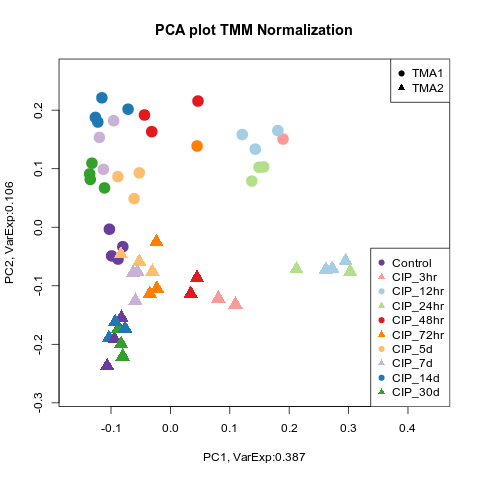

In [ ]:
%%R
# # Get the unique levels of the Treatment factor variable
treatment_levels <- levels(metadata1$Treatment)

# # Match the colors in col.cell with the corresponding levels in Treatment
col.treatment <- col.cell[match(metadata1$Treatment, treatment_levels)]

# Create the plot with the reordered legend and color vector
plot(s$u[,1], s$u[,2], pch=shape.cell, cex=2,
     xlab=paste0("PC1, VarExp:", round(Var[1],3)),
     ylab=paste0("PC2, VarExp:", round(Var[2],3)),
     main="PCA plot TMM Normalization",
     col=col.cell,
     ylim=c((min(s$u[,2])*1.2),(max(s$u[,2])*1.2)),
     xlim=c((min(s$u[,1])*1.2),(max(s$u[,1])*1.2)))

text(s$u[,1], s$u[,2],labels='',adj=c(0,2),cex=0.5)

# Create the legend for the col.treatment vector
legend("bottomright", legend = treatment_levels,
       col = unique(col.treatment), pch = unique(shape.cell), cex = 1)

# Create the second legend for shape.cell
legend("topright", legend = c("TMA1", "TMA2"),
       col = "black", pch = c(19, 17), cex = 1)


###PCA with batch correction

In [ ]:
%%R
# Remove batch effects using removeBatchEffect()
data_no_batch <- removeBatchEffect(log_counts, design=design, batch=slide)

In [ ]:
%%R
head(data_no_batch)

       TMA1 026 TMA1 017 TMA1 027 TMA1 003 TMA1 002 TMA1 004 TMA2 012 TMA1 009
Percc1 4.077268 4.256980 4.200478 4.111009 3.911742 4.262332 4.000218 4.020905
Ptges2 4.273968 3.964961 4.106203 4.117804 4.031615 4.078883 4.148524 4.071249
Dtd2   3.952610 3.945140 3.904407 4.237796 3.879927 4.012741 3.944090 4.109729
Eif2b5 4.071974 4.175620 4.234545 4.046336 4.270562 3.952006 4.001748 4.061904
Nkapd1 3.893902 3.814388 4.056814 4.087158 3.931698 4.199658 3.979925 4.000028
Plxdc2 3.983838 3.906440 4.021019 4.178701 4.086155 4.047737 4.093224 4.038267
       TMA2 029 TMA1 005 TMA1 015 TMA2 016 TMA2 021 TMA1 001 TMA1 020 TMA1 006
Percc1 4.094564 3.958381 4.084468 4.067628 4.061044 4.322214 4.009632 3.898119
Ptges2 3.951424 4.118858 3.981204 4.241446 4.131886 3.902397 4.108816 4.014689
Dtd2   4.064112 4.095029 4.051558 4.152500 3.886119 3.901000 3.992290 4.005112
Eif2b5 4.022970 4.187196 4.044682 4.216880 4.012386 4.046433 4.242186 4.260996
Nkapd1 3.861862 3.889241 4.024102 4.057183 4.039431 

In [ ]:
%%R

Y <- apply(data_no_batch, 1, function(y) scale(y, center=TRUE, scale=FALSE))
s <- svd(Y)
#  Get Variance explained by the components
Var1<-s$d^2/sum(s$d^2)
Var2<-cumsum(s$d^2/sum(s$d^2))
Var<-cbind(Var1,Var2)
Var<-round(Var,3)
colnames(Var)<-c("Percent Variance","Cumulative % Variance")
head(Var)

     Percent Variance Cumulative % Variance
[1,]            0.417                 0.417
[2,]            0.057                 0.474
[3,]            0.039                 0.513
[4,]            0.032                 0.545
[5,]            0.028                 0.573
[6,]            0.022                 0.595


In [ ]:
%%R
# Define the desired order of the factor levels
treatment_levels <- c("Control", "CIP_3hr", "CIP_12hr", "CIP_24hr", "CIP_48hr", "CIP_72hr", "CIP_5d", "CIP_7d", "CIP_14d", "CIP_30d")

# Reorder the factor levels of Treatment variable
metadata1$Treatment <- factor(metadata1$Treatment, levels = treatment_levels)

png("/content/drive/MyDrive/GeoMx_CIP/testPCA_batch.png", width = 2000, height = 1500, res =300)
par(family="Arial")

# Create the plot with the reordered legend
plot(s$u[,1], s$u[,2], pch=shape.cell, cex=2,
     xlab=paste0("PC1, VarExp:", round(Var[1],3)),
     ylab=paste0("PC2, VarExp:", round(Var[2],3)),
     main="PCA plot TMM Normalization",
     col=col.cell,
     ylim=c((min(s$u[,2])*1.2),(max(s$u[,2])*1.2)),
     xlim=c((min(s$u[,1])*1.2),(max(s$u[,1])*1.2)))

text(s$u[,1], s$u[,2],labels='',adj=c(0,2),cex=0.5)

legend("bottomright",legend = treatment_levels,
       col = unique(col.treatment), pch=unique(shape.cell), cex=1)

# Create the second legend for shape.cell
legend("topright", legend = c("TMA1", "TMA2"),
       col = "black", pch = c(19, 17), cex = 1)



In [ ]:
%%R

# Open a PNG device
png(filename = "my_plot.png", width = 1500, height = 1500, res = 300)


# # Get the unique levels of the Treatment factor variable
treatment_levels <- levels(metadata1$Treatment)

# Reorder the factor levels of Treatment variable
metadata1$Treatment <- factor(metadata1$Treatment, levels = treatment_levels)

# # Match the colors in col.cell with the corresponding levels in Treatment
col.treatment <- col.cell[match(metadata1$Treatment, treatment_levels)]

# Create the plot with the reordered legend
plot(s$u[,1], s$u[,2], pch=shape.cell, cex=2,
     xlab=paste0("PC1, VarExp:", round(Var[1],3)),
     ylab=paste0("PC2, VarExp:", round(Var[2],3)),
     main="PCA plot TMM Normalization",
     col=col.cell,
     ylim=c((min(s$u[,2])*1.2),(max(s$u[,2])*1.2)),
     xlim=c((min(s$u[,1])*1.2),(max(s$u[,1])*1.2)))

text(s$u[,1], s$u[,2],labels='',adj=c(0,2),cex=0.5)

# legend("bottomright",legend = treatment_levels,
#        col = unique(col.treatment), pch=unique(shape.cell), cex=1)

# # Create the second legend for shape.cell
# legend("topright", legend = c("TMA1", "TMA2"),
#        col = "black", pch = c(19, 17), cex = 1)


# Close the PNG device
dev.off()

png 
  2 
